# Joining Data
### *This notepad involves joining important csv files of data during my phd*
- The data is either molecular properties or biological results of my 53 screenining compounds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
from __future__ import print_function

# RDKit Modules
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import rdChemReactions
from rdkit.Chem import FunctionalGroups
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from itertools import chain
from rdkit.Chem import Descriptors

#### Import UEA csv file 
- The important columns here are "'TO Displacement', 'STDEV'" columns

In [2]:
df = pd.read_csv('UEA RESULTS.csv')
df = df[['Supplier ID', 'Mw', 'SMILES', 'TO Displacement', 'STDEV']]

#keep consistent throughout - On anlysis the supplier ids changed cases and had random spaces
df['Supplier ID'] = df['Supplier ID'].str.replace(' ', '')
df['Supplier ID'] = df['Supplier ID'].str.upper()

In [3]:
#find duplicate
dup = df["Supplier ID"]
df[dup.isin(dup[dup.duplicated()])].sort_values("Supplier ID")

,Supplier ID,Mw,SMILES,TO Displacement,STDEV
9,RAL631,252.33,CN1[C@H]2CC3=C(N=CC=C3)[C@@H]1C[C@H]2S(=O)(C)=O,-3.80%,5.47%
44,RAL631,252.33,THIS IS A REPEAT (sorry!),16.24%,2.74%


In [4]:
#drop repeat
df = df.drop([44])

#### Import GERMANY PURITY csv file 
- The important column is the purity

In [5]:
# import second 
df1 = pd.read_csv('GERMANY PURITY.csv')
df1 = df1[['Supplier_ID', 'Purity (%) @LCMS']]

In [6]:
#rename
df1.rename(columns={'Supplier_ID': 'Supplier ID'}, inplace=True)

In [7]:
#repeat procedure for deleting space and uppercase
df1['Supplier ID'] = df1['Supplier ID'].str.replace(' ', '')
df1['Supplier ID'] = df1['Supplier ID'].str.upper()

In [8]:
#merge data based off Supplier ID
UEA_results = pd.merge(df, df1, on='Supplier ID', how='outer')
UEA_results.rename(columns={'Purity (%) @LCMS': 'Purity'}, inplace=True)

#check to see compounds which are impure
impure_compounds = UEA_results.sort_values(by='Purity', ascending=True)
impure_compounds.head()

,Supplier ID,Mw,SMILES,TO Displacement,STDEV,Purity
5,RAL565,376.47,CN(C(NC1=CC=CC(C#N)=C1)=O)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2,-1.87%,9.73%,58.0
47,RAL365,371.42,O=C(N1[C@H]2[C@@H](C3=CC=C(F)C=C3)C[C@@H](O)[C@@H]1C[C@H]2S(=O)(C)=O)COC,-5.13%,1.90%,62.0
12,RAL571,362.49,CC(C)N1[C@H]2CC[C@@H](OCC3=CC(C#N)=CC=C3)[C@@H]1C[C@H]2S(=O)(C)=O,-0.54%,4.49%,63.0
8,RAL432,270.30,O=C(C(C(C)=NO1)=C1[C@@H]2N3C)[C@@H]3C[C@H]2S(=O)(C)=O,-8.07%,7.58%,64.0
24,RAL307,390.47,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC4=NC=CC=C4)C2,-18.04%,4.04%,73.0


In [9]:
## lets filter for purity - 85% is the limit
impure_compounds = impure_compounds.query('Purity <85.0')
impure_compounds

,Supplier ID,Mw,SMILES,TO Displacement,STDEV,Purity
5,RAL565,376.47,CN(C(NC1=CC=CC(C#N)=C1)=O)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2,-1.87%,9.73%,58.0
47,RAL365,371.42,O=C(N1[C@H]2[C@@H](C3=CC=C(F)C=C3)C[C@@H](O)[C@@H]1C[C@H]2S(=O)(C)=O)COC,-5.13%,1.90%,62.0
12,RAL571,362.49,CC(C)N1[C@H]2CC[C@@H](OCC3=CC(C#N)=CC=C3)[C@@H]1C[C@H]2S(=O)(C)=O,-0.54%,4.49%,63.0
8,RAL432,270.30,O=C(C(C(C)=NO1)=C1[C@@H]2N3C)[C@@H]3C[C@H]2S(=O)(C)=O,-8.07%,7.58%,64.0
24,RAL307,390.47,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC4=NC=CC=C4)C2,-18.04%,4.04%,73.0
43,RAL452,354.44,O[C@@H]1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2CC3=CC=C(F)C=C3)[C@@H]4[C@H]1CNC4,2.33%,2.28%,81.0
19,RAL566,376.49,CN(S(=O)(C1=NC=CN1C)=O)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2,13.69%,2.35%,81.0
35,RAL374,313.39,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](O)C2,-9.14%,3.26%,82.0
25,RAL378,433.50,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC(NC4=CN=CC=C4)=O)C2,11.27%,10.52%,83.0
18,RAL569,354.44,CN(C(C1=CC=C(F)C=C1)=O)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2,14.98%,4.12%,84.0


### Important for later analysis
- __These compounds probably should be taken out of the later analysis due to purity issues__

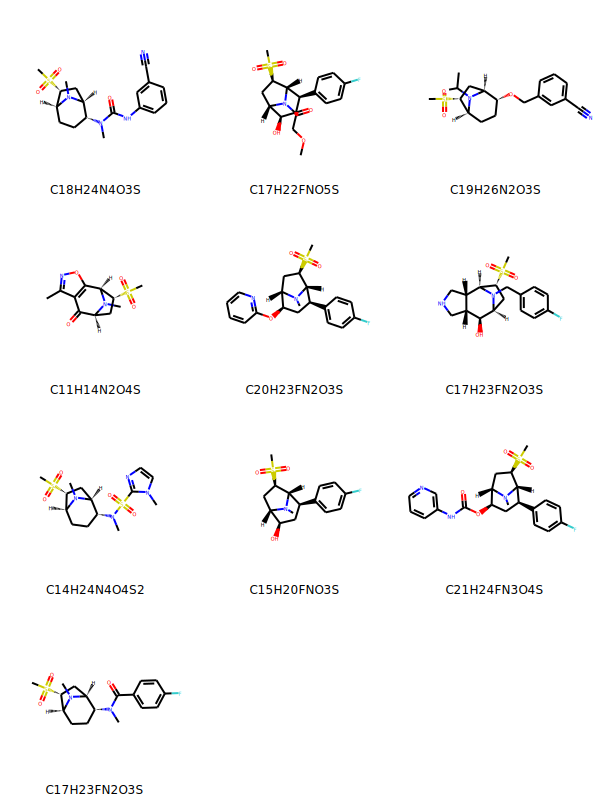

In [10]:
#find the impure compounds
impure_compounds = impure_compounds['SMILES']
# use rdkit to show impure compounds
impure_compounds = [Chem.MolFromSmiles(mol) for mol in impure_compounds]
formulae_1 = [rdMolDescriptors.CalcMolFormula(mol) for mol in impure_compounds]
Draw.MolsToGridImage(impure_compounds, legends = formulae_1)

## Germany Hedgehog signalling pathway assay and Autophagy assay

In [11]:
                            ### repeat procedure on germany compounds ###
    
#open germany compound data, drop unwanted and rename
g_comp = pd.read_csv('Hedghog germany.csv')
g_comp = g_comp[['Supplier_ID/Enso name', '% activity@ Autophagy', '% activity@ Autophagy rapamycin', '% activity@ Hedgehog osteogenesis','% activity@ Hedgehog osteogenesis-Viability', 'IC50 (µM)@ Hedgehog osteogenesis', 'IC50 (µM)@ Hedgehog osteogenesis-Viability']]
g_comp.rename(columns={'Supplier_ID/Enso name': 'Supplier ID'}, inplace=True)

In [12]:
#repeat procedure for deleting space and uppercase
g_comp['Supplier ID'] = g_comp['Supplier ID'].str.replace(' ', '')
g_comp['Supplier ID'] = g_comp['Supplier ID'].str.upper()

In [13]:
#combine germany and uea data
germany_and_uea = pd.merge(g_comp, UEA_results, on = 'Supplier ID', how='outer')
germany_and_uea.tail()

,Supplier ID,% activity@ Autophagy,% activity@ Autophagy rapamycin,% activity@ Hedgehog osteogenesis,% activity@ Hedgehog osteogenesis-Viability,IC50 (µM)@ Hedgehog osteogenesis,IC50 (µM)@ Hedgehog osteogenesis-Viability,Mw,SMILES,TO Displacement,STDEV,Purity
48,RAL485,73.0,72.0,132.0,70.0,NaN,NaN,337.44,OC1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2C)[C@@H]3[C@H]1CN(C4=NC=CC=C4)C3,-72.20%,12.85%,100.0
49,RAL567,94.0,80.0,72.0,84.0,NaN,NaN,406.46,CN(CC1=CC=C(OC(F)(F)F)C=C1)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2,-46.08%,10.35%,99.0
50,RAL208,76.0,94.0,58.0,68.0,NaN,NaN,472.62,O=S([C@@H]1C[C@H]2C(N=C(C3=CC=CC=C3)S4)=C4C[C@@H]1N2CC5=CC=CC=C5)(C6=CC=CC=C6)=O,NaN,NaN,87.0
51,RAL655,107.0,122.0,95.0,107.0,NaN,NaN,309.36,O=C1[C@H]2C[C@@H](S(=O)(C)=O)[C@@H]([N@@]2CC3=C4C=CC(F)=C3)[C@@H]4C1,NaN,NaN,97.0
52,RAL460,119.0,81.0,106.0,80.0,NaN,NaN,445.55,FC(C=C1)=CC=C1CN2[C@H]3[C@@H]4[C@@H](CN(CC5=CN=CC=C5)C4)[C@H](O)[C@@H]2C[C@H]3S(=O)(C)=O,-9.74%,7.02%,97.0


## Cape Town _Mycobacterium tuberculosis (Mtb)_ assay

In [14]:
                                    ### repeat procedure###
CT_comp = pd.read_csv('Mtb MICs.csv')
CT_comp.tail()

,Position,Supplier,Supplier ID,SMILES,VISUAL MIC90 7D 7H9 GLU CAS TX (uM),VISUAL MIC90 7D 7H9 GLU ADC TW (uM),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
48,E2,UEA compounds,RAL365,O=C(N1[C@H]2[C@@H](C3=CC=C(F)C=C3)C[C@@H](O)[C@@H]1C[C@H]2S(=O)(C)=O)COC,> 125,> 125,NaN,NaN,NaN,NaN,NaN
49,E3,UEA compounds,RAL485,OC1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2C)[C@@H]3[C@H]1CN(C4=NC=CC=C4)C3,> 125,> 125,NaN,NaN,NaN,NaN,NaN
50,E4,UEA compounds,RAL567,CN(CC1=CC=C(OC(F)(F)F)C=C1)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2,> 125,> 125,NaN,NaN,NaN,NaN,NaN
51,E5,UEA compounds,RAL208,O=S([C@@H]1C[C@H]2C(N=C(C3=CC=CC=C3)S4)=C4C[C@@H]1N2CC5=CC=CC=C5)(C6=CC=CC=C6)=O,> 125,> 125,NaN,NaN,NaN,NaN,NaN
52,E6,UEA compounds,RAL655,O=C1[C@H]2C[C@@H](S(=O)(C)=O)[C@@H]([N@@]2CC3=C4C=CC(F)=C3)[C@@H]4C1,> 125,> 125,NaN,NaN,NaN,NaN,NaN


In [15]:
#CT_comp = CT_comp[['Supplier ID', 'VISUAL MIC90 7D 7H9 GLU CAS TX (uM)', 'VISUAL MIC90 7D 7H9 GLU ADC TW (uM)' ]]
CT_comp = CT_comp.drop(['Supplier', 'Position', 'SMILES','Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10' ],axis=1)

In [16]:
#repeat procedure for deleting space and uppercase
CT_comp['Supplier ID'] = CT_comp['Supplier ID'].str.replace(' ', '')
CT_comp['Supplier ID'] = CT_comp['Supplier ID'].str.upper()

In [17]:
#combine data
germany_and_uea_CT = pd.merge(CT_comp, germany_and_uea, on = 'Supplier ID', how='outer')

In [18]:
#find duplicate
dup = germany_and_uea_CT["Supplier ID"]
germany_and_uea_CT[dup.isin(dup[dup.duplicated()])].sort_values("Supplier ID")

,Supplier ID,VISUAL MIC90 7D 7H9 GLU CAS TX (uM),VISUAL MIC90 7D 7H9 GLU ADC TW (uM),% activity@ Autophagy,% activity@ Autophagy rapamycin,% activity@ Hedgehog osteogenesis,% activity@ Hedgehog osteogenesis-Viability,IC50 (µM)@ Hedgehog osteogenesis,IC50 (µM)@ Hedgehog osteogenesis-Viability,Mw,SMILES,TO Displacement,STDEV,Purity
9,RAL631,> 125,> 125,111.0,124.0,93.0,103.0,NaN,NaN,252.33,CN1[C@H]2CC3=C(N=CC=C3)[C@@H]1C[C@H]2S(=O)(C)=O,-3.80%,5.47%,100.0
10,RAL631,> 125,> 125,111.0,124.0,93.0,103.0,NaN,NaN,252.33,CN1[C@H]2CC3=C(N=CC=C3)[C@@H]1C[C@H]2S(=O)(C)=O,-3.80%,5.47%,100.0


In [19]:
#drop repeat
germany_and_uea_CT = germany_and_uea_CT.drop([9])

In [20]:
#check to see compounds which are impure
germany_and_uea_CT = germany_and_uea_CT.sort_values(by='Supplier ID', ascending=True)
germany_and_uea_CT.head()

,Supplier ID,VISUAL MIC90 7D 7H9 GLU CAS TX (uM),VISUAL MIC90 7D 7H9 GLU ADC TW (uM),% activity@ Autophagy,% activity@ Autophagy rapamycin,% activity@ Hedgehog osteogenesis,% activity@ Hedgehog osteogenesis-Viability,IC50 (µM)@ Hedgehog osteogenesis,IC50 (µM)@ Hedgehog osteogenesis-Viability,Mw,SMILES,TO Displacement,STDEV,Purity
51,RAL208,> 125,> 125,76.0,94.0,58.0,68.0,NaN,NaN,472.62,O=S([C@@H]1C[C@H]2C(N=C(C3=CC=CC=C3)S4)=C4C[C@@H]1N2CC5=CC=CC=C5)(C6=CC=CC=C6)=O,NaN,NaN,87.0
25,RAL307,> 125,> 125,NaN,NaN,NaN,NaN,NaN,NaN,390.47,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC4=NC=CC=C4)C2,-18.04%,4.04%,73.0
23,RAL323,> 125,> 125,110.0,108.0,132.0,95.0,NaN,NaN,396.50,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC4=NC=CS4)C2,0.29%,3.32%,NaN
47,RAL327,> 125,> 125,103.0,100.0,136.0,105.0,NaN,NaN,391.46,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC4=CC=NC=N4)C2,-11.53%,6.97%,95.0
34,RAL354,> 125,> 125,85.0,81.0,114.0,85.0,NaN,NaN,299.36,FC(C=C1)=CC=C1[C@@H]2[C@H](N3)[C@H](S(=O)(C)=O)C[C@H]3[C@H](O)C2,0.46%,2.37%,97.0


## _Plasmodium falciparum_ Assay

In [21]:
                                ### repeat procedure###
CT_comp_2= pd.read_csv('Pf IC50s.csv')
CT_comp_2 = CT_comp_2[['Supplier ID', 'Unnamed: 10','NF54 test 1: IC50 (nM)', 'Unnamed: 12',  'NF54 test 2: IC50 (nM)', 'Unnamed: 14', 'Average NF54: IC50 (nM)' ]]

In [22]:
#repeat procedure for deleting space and uppercase
CT_comp_2['Supplier ID'] = CT_comp_2['Supplier ID'].str.replace(' ', '')
CT_comp_2['Supplier ID'] = CT_comp_2['Supplier ID'].str.upper()

In [23]:
#drop NaN values if all the rows contain NaN
CT_comp_2 = CT_comp_2.dropna(how='all')
#check to see compounds which are impure
CT_comp_2 = CT_comp_2.sort_values(by='Supplier ID', ascending=True)
CT_comp_2.head()

,Supplier ID,Unnamed: 10,NF54 test 1: IC50 (nM),Unnamed: 12,NF54 test 2: IC50 (nM),Unnamed: 14,Average NF54: IC50 (nM)
52,RAL208,>,6000.0,>,6000.0,>,6000.0
24,RAL307,>,6000.0,>,6000.0,>,6000.0
22,RAL323,>,6000.0,>,6000.0,>,6000.0
48,RAL327,>,6000.0,>,6000.0,>,6000.0
34,RAL354,>,6000.0,>,6000.0,>,6000.0


In [24]:
#find duplicate
dup = CT_comp_2["Supplier ID"]
CT_comp_2[dup.isin(dup[dup.duplicated()])].sort_values("Supplier ID")

,Supplier ID,Unnamed: 10,NF54 test 1: IC50 (nM),Unnamed: 12,NF54 test 2: IC50 (nM),Unnamed: 14,Average NF54: IC50 (nM)
44,RAL631,>,6000.0,>,6000.0,>,6000.0
9,RAL631,>,6000.0,>,6000.0,>,6000.0


In [25]:
CT_comp_2 = CT_comp_2.drop([9])

In [26]:
#combine data
germany_and_uea_CT = pd.merge(CT_comp_2, germany_and_uea_CT, on = 'Supplier ID', how='outer')
germany_and_uea_CT.tail()

,Supplier ID,Unnamed: 10,NF54 test 1: IC50 (nM),Unnamed: 12,NF54 test 2: IC50 (nM),Unnamed: 14,Average NF54: IC50 (nM),VISUAL MIC90 7D 7H9 GLU CAS TX (uM),VISUAL MIC90 7D 7H9 GLU ADC TW (uM),% activity@ Autophagy,% activity@ Autophagy rapamycin,% activity@ Hedgehog osteogenesis,% activity@ Hedgehog osteogenesis-Viability,IC50 (µM)@ Hedgehog osteogenesis,IC50 (µM)@ Hedgehog osteogenesis-Viability,Mw,SMILES,TO Displacement,STDEV,Purity
48,RAL652,>,6000.0,>,6000.0,NaN,6000.0,> 125,> 125,89.0,82.0,99.0,69.0,NaN,NaN,389.32,CN1[C@H]2CC3=C(C(C(F)(F)F)=NC(C(F)(F)F)=N3)[C@@H]1C[C@H]2S(=O)(C)=O,6.67%,2.45%,100.0
49,RAL655,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,107.0,122.0,95.0,107.0,NaN,NaN,309.36,O=C1[C@H]2C[C@@H](S(=O)(C)=O)[C@@H]([N@@]2CC3=C4C=CC(F)=C3)[C@@H]4C1,NaN,NaN,97.0
50,RAL668,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,87.0,92.0,124.0,68.0,NaN,NaN,231.29,O[C@H](CC[C@@H]1N2CC3=CC=CC=C3)[C@@H]2CC1=O,43.66%,2.87%,100.0
51,RAL684,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,92.0,80.0,123.0,77.0,NaN,NaN,355.45,O[C@H]1[C@H]2C[C@@H](S(=O)(C3=CC=CC=C3)=O)[C@@H]([N@@]2CC4=C5C=CC=C4)[C@@H]5C1,-4.43%,10.30%,89.0
52,RAL605SM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,64.0,93.0,71.0,NaN,NaN,353.43,O=C1C[C@@H]2[C@@H]3[C@H](S(=O)(c4ccccc4)=O)C[C@H]1N3Cc5c2cccc5,NaN,NaN,95.0


## Molecular properties csv file

In [27]:
llama = pd.read_csv('LLAMA SCREENING CMPS.csv')
llama = llama.drop(['Lipinski rule-of-5 failures','Plane of best fit', 'Murcko framework', 'Murcko framework with alpha atoms','Type','Parent molecule 1 ID', 'Parent molecule 1 canonical SMILES', 'Parent molecule 2 ID', 'Parent molecule 2 canonical SMILES', 'Product of reaction' ], axis=1)
llama.head()

,Molecule ID,Canonical SMILES,RMM,AlogP,Lead-likeness penalty,tPSA,Carbon sp3 fraction,PMI x (I1),PMI y (I2),Heavy atoms,Aliphatic rings,Aromatic rings,Heteroatoms,Chiral centres,Rotatable bonds
0,46,CS(=O)(=O)[C@@H]1C[C@@H]2[C@H](O)[C@@H]3CNC[C@@H]3[C@H]1N2Cc1ccc(F)cc1,354.440,0.09,0.0,69.64,0.647059,0.29429,0.88841,24.0,3.0,1.0,7.0,6.0,3.0
1,47,CS(=O)(=O)[C@@H]1C[C@H]2N[C@@H]1[C@H](C[C@H]2O)c1ccc(F)cc1,299.361,0.30,0.0,66.40,0.571429,0.25676,0.88021,20.0,2.0,1.0,6.0,5.0,2.0
2,48,CS(=O)(=O)[C@@H]1C[C@@H]2[C@H](O)C[C@@H]([C@H]1N2C(=O)C1CC1)c1ccc(F)cc1,367.430,0.86,1.0,74.68,0.611111,0.46003,0.89045,25.0,3.0,1.0,7.0,5.0,4.0
3,49,CS(=O)(=O)[C@@H]1C[C@@H]2[C@H](O)C[C@@H]([C@H]1N2C(=O)COC)c1ccc(F)cc1,371.424,0.27,1.0,83.91,0.588235,0.50701,0.86133,25.0,2.0,1.0,8.0,5.0,5.0
4,50,CS(=O)(=O)[C@@H]1C[C@@H]2C=C[C@@H]([C@H]1N2S(=O)(=O)c1[n]cc[n]1C)c1ccc(F)cc1,425.497,1.28,3.0,89.34,0.388889,0.48128,0.83397,28.0,2.0,2.0,10.0,4.0,4.0


In [28]:
#round to two decimal places
llama['RMM'] = llama['RMM'].astype(float).round(2)

In [29]:
#rename column
llama.rename(columns={'RMM': 'Mw'}, inplace=True)

In [30]:
#merge results
ALL_and_llama = pd.merge(germany_and_uea_CT, llama, on = 'Mw', how='outer')
ALL_and_llama.head()

,Supplier ID,Unnamed: 10,NF54 test 1: IC50 (nM),Unnamed: 12,NF54 test 2: IC50 (nM),Unnamed: 14,Average NF54: IC50 (nM),VISUAL MIC90 7D 7H9 GLU CAS TX (uM),VISUAL MIC90 7D 7H9 GLU ADC TW (uM),% activity@ Autophagy,...,tPSA,Carbon sp3 fraction,PMI x (I1),PMI y (I2),Heavy atoms,Aliphatic rings,Aromatic rings,Heteroatoms,Chiral centres,Rotatable bonds
0,RAL208,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,76.0,...,50.27,0.222222,0.46715,0.66735,33.0,2.0,4.0,6.0,3.0,5.0
1,RAL307,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,NaN,...,59.50,0.450000,0.49953,0.60370,27.0,2.0,2.0,7.0,5.0,4.0
2,RAL323,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,110.0,...,59.50,0.500000,0.44726,0.66823,26.0,2.0,2.0,8.0,5.0,4.0
3,RAL323,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,110.0,...,84.94,0.631579,0.25519,0.84266,27.0,2.0,1.0,8.0,3.0,5.0
4,RAL573,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,86.0,...,59.50,0.500000,0.44726,0.66823,26.0,2.0,2.0,8.0,5.0,4.0


In [33]:
## now lets look at the duplicates
dup = ALL_and_llama["Supplier ID"]
ALL_and_llama[dup.isin(dup[dup.duplicated()])].sort_values("Supplier ID")

,Supplier ID,Unnamed: 10,NF54 test 1: IC50 (nM),Unnamed: 12,NF54 test 2: IC50 (nM),Unnamed: 14,Average NF54: IC50 (nM),VISUAL MIC90 7D 7H9 GLU CAS TX (uM),VISUAL MIC90 7D 7H9 GLU ADC TW (uM),% activity@ Autophagy,...,tPSA,Carbon sp3 fraction,PMI x (I1),PMI y (I2),Heavy atoms,Aliphatic rings,Aromatic rings,Heteroatoms,Chiral centres,Rotatable bonds
2,RAL323,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,110.0,...,59.50,0.500000,0.44726,0.66823,26.0,2.0,2.0,8.0,5.0,4.0
3,RAL323,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,110.0,...,84.94,0.631579,0.25519,0.84266,27.0,2.0,1.0,8.0,3.0,5.0
19,RAL452,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,78.0,...,69.64,0.647059,0.29429,0.88841,24.0,3.0,1.0,7.0,6.0,3.0
20,RAL452,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,78.0,...,57.69,0.588235,0.20438,0.92351,24.0,2.0,1.0,7.0,3.0,4.0
21,RAL569,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,101.0,...,69.64,0.647059,0.29429,0.88841,24.0,3.0,1.0,7.0,6.0,3.0
22,RAL569,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,101.0,...,57.69,0.588235,0.20438,0.92351,24.0,2.0,1.0,7.0,3.0,4.0
4,RAL573,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,86.0,...,59.50,0.500000,0.44726,0.66823,26.0,2.0,2.0,8.0,5.0,4.0
5,RAL573,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,86.0,...,84.94,0.631579,0.25519,0.84266,27.0,2.0,1.0,8.0,3.0,5.0
41,RAL574,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,107.0,...,75.71,0.611111,0.30881,0.80765,26.0,2.0,1.0,8.0,3.0,4.0
42,RAL574,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,107.0,...,75.71,0.611111,0.39519,0.82130,26.0,2.0,1.0,8.0,4.0,4.0


In [34]:
duplicate = ALL_and_llama[dup.isin(dup[dup.duplicated()])].sort_values("Supplier ID")
duplicate = duplicate[['Supplier ID', 'Mw', 'Purity', 'SMILES', 'tPSA']]
duplicate

,Supplier ID,Mw,Purity,SMILES,tPSA
2,RAL323,396.50,NaN,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC4=NC=CS4)C2,59.50
3,RAL323,396.50,NaN,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC4=NC=CS4)C2,84.94
19,RAL452,354.44,81.0,O[C@@H]1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2CC3=CC=C(F)C=C3)[C@@H]4[C@H]1CNC4,69.64
20,RAL452,354.44,81.0,O[C@@H]1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2CC3=CC=C(F)C=C3)[C@@H]4[C@H]1CNC4,57.69
21,RAL569,354.44,84.0,CN(C(C1=CC=C(F)C=C1)=O)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2,69.64
22,RAL569,354.44,84.0,CN(C(C1=CC=C(F)C=C1)=O)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2,57.69
4,RAL573,396.50,96.0,CC(C)N1[C@H]2CC[C@@H](OC(NC3=CC=C(OC)C=C3)=O)[C@@H]1C[C@H]2S(=O)(C)=O,59.50
5,RAL573,396.50,96.0,CC(C)N1[C@H]2CC[C@@H](OC(NC3=CC=C(OC)C=C3)=O)[C@@H]1C[C@H]2S(=O)(C)=O,84.94
41,RAL574,384.47,97.0,CC(C)N1[C@H]2CC[C@@H](OC(NC3=CC=CC(F)=C3)=O)[C@@H]1C[C@H]2S(=O)(C)=O,75.71
42,RAL574,384.47,97.0,CC(C)N1[C@H]2CC[C@@H](OC(NC3=CC=CC(F)=C3)=O)[C@@H]1C[C@H]2S(=O)(C)=O,75.71


In [35]:
# some may match on Mw but not PSA, if we caluclate and compare then we know which ones to delete
Descriptors.TPSA(Chem.MolFromSmiles('FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC4=NC=CS4)C2'))

59.5

In [36]:
Descriptors.TPSA(Chem.MolFromSmiles('O[C@@H]1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2CC3=CC=C(F)C=C3)[C@@H]4[C@H]1CNC4'))

69.64

In [37]:
Descriptors.TPSA(Chem.MolFromSmiles('CN(C(C1=CC=C(F)C=C1)=O)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2'))

57.690000000000005

In [39]:
ALL_and_llama= ALL_and_llama.drop([3,5,20,21,41,50,52,60,61])

In [ ]:
#tried to itterate over rows but for some reason it doesnt like redkit


#duplicate.apply(Descriptors.TPSA(Chem.MolFromSmiles()))
#for lab, row in duplicate.iterrows():
    #duplicate['PTSA']= duplicate['SMILES'].apply(Descriptors.TPSA(Chem.MolFromSmiles()))

In [40]:
dup2 = ALL_and_llama[dup.isin(dup[dup.duplicated()])].sort_values("Supplier ID")
dup2

/Users/bobbylowe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Supplier ID,Unnamed: 10,NF54 test 1: IC50 (nM),Unnamed: 12,NF54 test 2: IC50 (nM),Unnamed: 14,Average NF54: IC50 (nM),VISUAL MIC90 7D 7H9 GLU CAS TX (uM),VISUAL MIC90 7D 7H9 GLU ADC TW (uM),% activity@ Autophagy,...,tPSA,Carbon sp3 fraction,PMI x (I1),PMI y (I2),Heavy atoms,Aliphatic rings,Aromatic rings,Heteroatoms,Chiral centres,Rotatable bonds
2,RAL323,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,110.0,...,59.50,0.500000,0.44726,0.66823,26.0,2.0,2.0,8.0,5.0,4.0
19,RAL452,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,78.0,...,69.64,0.647059,0.29429,0.88841,24.0,3.0,1.0,7.0,6.0,3.0
22,RAL569,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,101.0,...,57.69,0.588235,0.20438,0.92351,24.0,2.0,1.0,7.0,3.0,4.0
4,RAL573,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,86.0,...,59.50,0.500000,0.44726,0.66823,26.0,2.0,2.0,8.0,5.0,4.0
42,RAL574,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,107.0,...,75.71,0.611111,0.39519,0.82130,26.0,2.0,1.0,8.0,4.0,4.0
51,RAL640,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,91.0,...,50.27,0.388889,0.48134,0.82603,23.0,2.0,2.0,5.0,3.0,2.0
53,RAL644,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,87.0,...,50.27,0.388889,0.48134,0.82603,23.0,2.0,2.0,5.0,3.0,2.0


In [41]:
dup2 = dup2[['Supplier ID', 'Mw', 'Purity', 'SMILES', 'tPSA']]
dup2

,Supplier ID,Mw,Purity,SMILES,tPSA
2,RAL323,396.50,NaN,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=O)C[C@H]3[C@H](OC4=NC=CS4)C2,59.50
19,RAL452,354.44,81.0,O[C@@H]1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2CC3=CC=C(F)C=C3)[C@@H]4[C@H]1CNC4,69.64
22,RAL569,354.44,84.0,CN(C(C1=CC=C(F)C=C1)=O)[C@H]2[C@@H]3C[C@@H](S(=O)(C)=O)[C@@H](N3C)CC2,57.69
4,RAL573,396.50,96.0,CC(C)N1[C@H]2CC[C@@H](OC(NC3=CC=C(OC)C=C3)=O)[C@@H]1C[C@H]2S(=O)(C)=O,59.50
42,RAL574,384.47,97.0,CC(C)N1[C@H]2CC[C@@H](OC(NC3=CC=CC(F)=C3)=O)[C@@H]1C[C@H]2S(=O)(C)=O,75.71
51,RAL640,328.43,100.0,O=S([C@@H]1C[C@H]2C(N=CC=C3)=C3C[C@@H]1N2CC4=CC=CC=C4)(C)=O,50.27
53,RAL644,328.43,85.0,CN1[C@H]2CC3=C(N=CC=C3C4=CC=CC=C4)[C@@H]1C[C@H]2S(=O)(C)=O,50.27


In [42]:
Descriptors.TPSA(Chem.MolFromSmiles('O=S([C@@H]1C[C@H]2C(N=CC=C3)=C3C[C@@H]1N2CC4=CC=CC=C4)(C)=O'))

50.27

In [43]:
Descriptors.TPSA(Chem.MolFromSmiles('CN1[C@H]2CC3=C(N=CC=C3C4=CC=CC=C4)[C@@H]1C[C@H]2S(=O)(C)=O'))

50.27

#### Hmmm this doesn't look right lets check if the compounds are correct by viewing the SMILES
- It could just be they are very similar

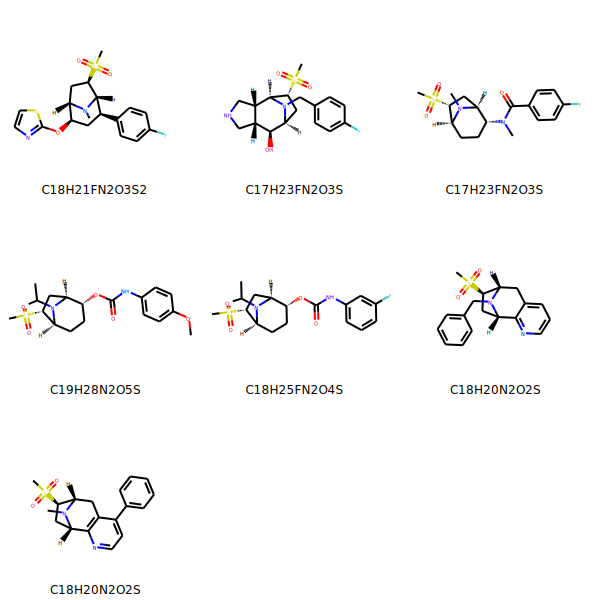

In [44]:
#find the impure compounds
dup2 = dup2['SMILES']
# use rdkit to show impure compounds
dup2 = [Chem.MolFromSmiles(mol) for mol in dup2]
formulae_1 = [rdMolDescriptors.CalcMolFormula(mol) for mol in dup2]
Draw.MolsToGridImage(dup2, legends = formulae_1)

#### The important question.... Is there 53 items for my 53 compounds?

In [45]:
ALL_and_llama['Supplier ID'].count()

53

In [46]:
#save data
ALL_and_llama.to_csv('My52ScreeningCompounds.csv', sep=',')

In [47]:
ALL_and_llama

,Supplier ID,Unnamed: 10,NF54 test 1: IC50 (nM),Unnamed: 12,NF54 test 2: IC50 (nM),Unnamed: 14,Average NF54: IC50 (nM),VISUAL MIC90 7D 7H9 GLU CAS TX (uM),VISUAL MIC90 7D 7H9 GLU ADC TW (uM),% activity@ Autophagy,...,tPSA,Carbon sp3 fraction,PMI x (I1),PMI y (I2),Heavy atoms,Aliphatic rings,Aromatic rings,Heteroatoms,Chiral centres,Rotatable bonds
0,RAL208,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,76.0,...,50.27,0.222222,0.46715,0.66735,33.0,2.0,4.0,6.0,3.0,5.0
1,RAL307,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,NaN,...,59.50,0.450000,0.49953,0.60370,27.0,2.0,2.0,7.0,5.0,4.0
2,RAL323,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,110.0,...,59.50,0.500000,0.44726,0.66823,26.0,2.0,2.0,8.0,5.0,4.0
4,RAL573,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,86.0,...,59.50,0.500000,0.44726,0.66823,26.0,2.0,2.0,8.0,5.0,4.0
6,RAL327,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,103.0,...,72.39,0.473684,0.40224,0.70839,27.0,2.0,2.0,8.0,5.0,4.0
7,RAL354,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,85.0,...,66.40,0.571429,0.25676,0.88021,20.0,2.0,1.0,6.0,5.0,2.0
8,RAL365,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,NaN,...,83.91,0.588235,0.50701,0.86133,25.0,2.0,1.0,8.0,5.0,5.0
9,RAL371,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,83.0,...,74.68,0.611111,0.46003,0.89045,25.0,3.0,1.0,7.0,5.0,4.0
10,RAL374,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,97.0,...,57.61,0.600000,0.31236,0.86073,21.0,2.0,1.0,6.0,5.0,2.0
11,RAL375,>,6000.0,>,6000.0,>,6000.0,> 125,> 125,94.0,...,49.41,0.684211,0.46306,0.67555,25.0,3.0,1.0,6.0,5.0,5.0
